In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

athlete=pd.read_csv('/content/athlete_events.csv.zip')
noc_regions=pd.read_csv('/content/noc_regions.csv')


In [2]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
#merging the dataframe
athlete_df=athlete.merge(noc_regions,how='left',on='NOC')
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
athlete_df.shape

(271116, 17)

In [6]:
#make coloumns names consistent
athlete_df.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [7]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [8]:
athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
na_coloumns=athlete_df.isna().any()
na_coloumns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [10]:
athlete_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [11]:
#india details
athlete_df.query('Team=="India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [12]:
#japan details
athlete_df.query('Team=="Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [13]:
#top 10 countries since the inception
top_10_countries=athlete_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

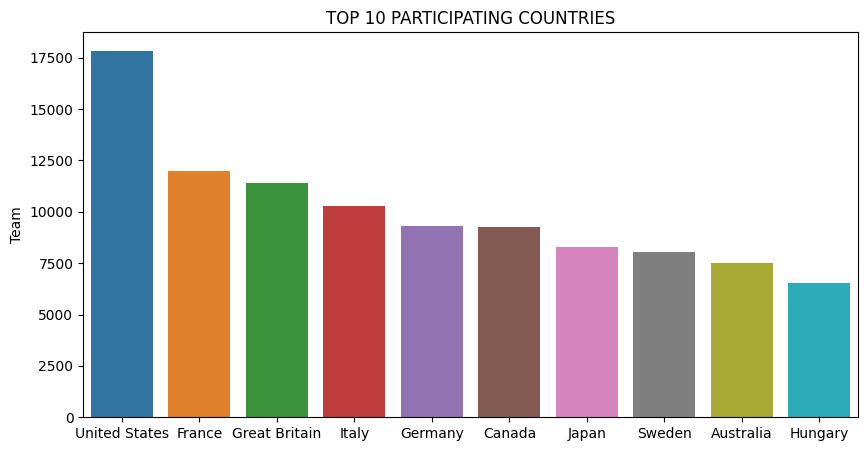

In [14]:
#ploting top 10 countries
plt.figure(figsize=(10,5))
plt.title("TOP 10 PARTICIPATING COUNTRIES")
sns.barplot(x=top_10_countries.index , y=top_10_countries)
plt.show()

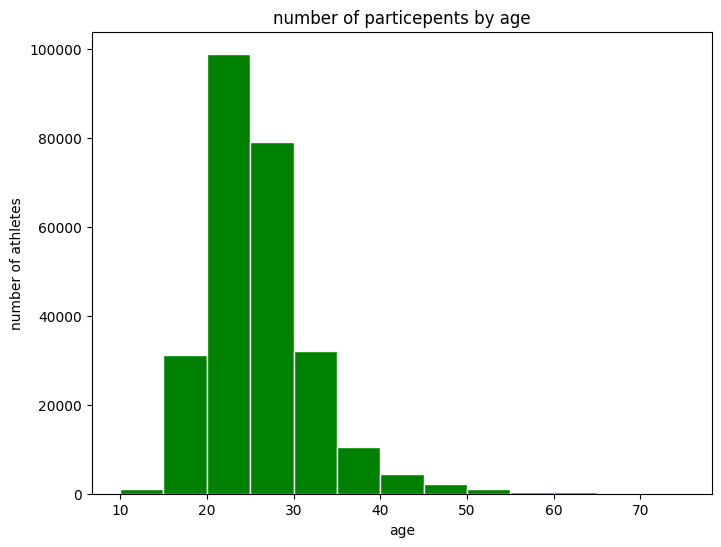

In [15]:
#ploting the particepent by their age
plt.figure(figsize=(8,6))
plt.title("number of particepents by age")
plt.xlabel("age")
plt.ylabel("number of athletes")
plt.hist(athlete_df.Age, bins=np.arange(10,80,5), color="green",edgecolor="white")
plt.show()

In [16]:
#winter sports
winter_sports=athlete_df[athlete_df.Season=="Winter"].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [17]:
#Summer sports
Summer_sports=athlete_df[athlete_df.Season=="Summer"].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [18]:
#Male and Female participants
Gender_count=athlete_df.Sex.value_counts()
Gender_count

M    196594
F     74522
Name: Sex, dtype: int64

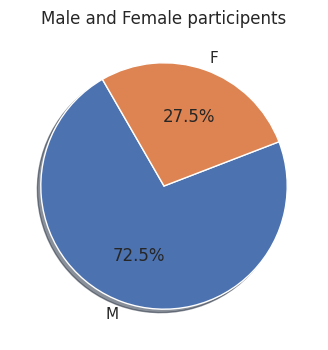

In [64]:
#ploting pie chart for male and female participents

plt.figure(figsize=(5,4))
plt.title("Male and Female participents")
plt.pie(Gender_count,labels=Gender_count.index,shadow=True,startangle=120,autopct='%1.1f%%')
plt.show()

In [20]:
medel_count=athlete_df.Medal.value_counts()
medel_count

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [21]:
#total number of female athelete in each winter olympic

Female_athlete_winter=athlete_df[(athlete_df.Sex=='F') & (athlete_df.Season=='Winter')][['Year','Sex']]
Female_athlete= Female_athlete_winter.groupby('Year').count().reset_index().rename(columns={'Sex':'Female_paricipants'})
Female_athlete

,Year,Female_paricipants
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133
5,1952,185
6,1956,246
7,1960,295
8,1964,404
9,1968,416


In [22]:
#total number of female athelete in each summer olympic

Female_athlete_summer=athlete_df[(athlete_df.Sex=='F') & (athlete_df.Season=='Summer')][['Year','Sex']]
Female_athlete= Female_athlete_summer.groupby('Year').count().reset_index().rename(columns={'Sex':'Female_paricipants'})
Female_athlete

,Year,Female_paricipants
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


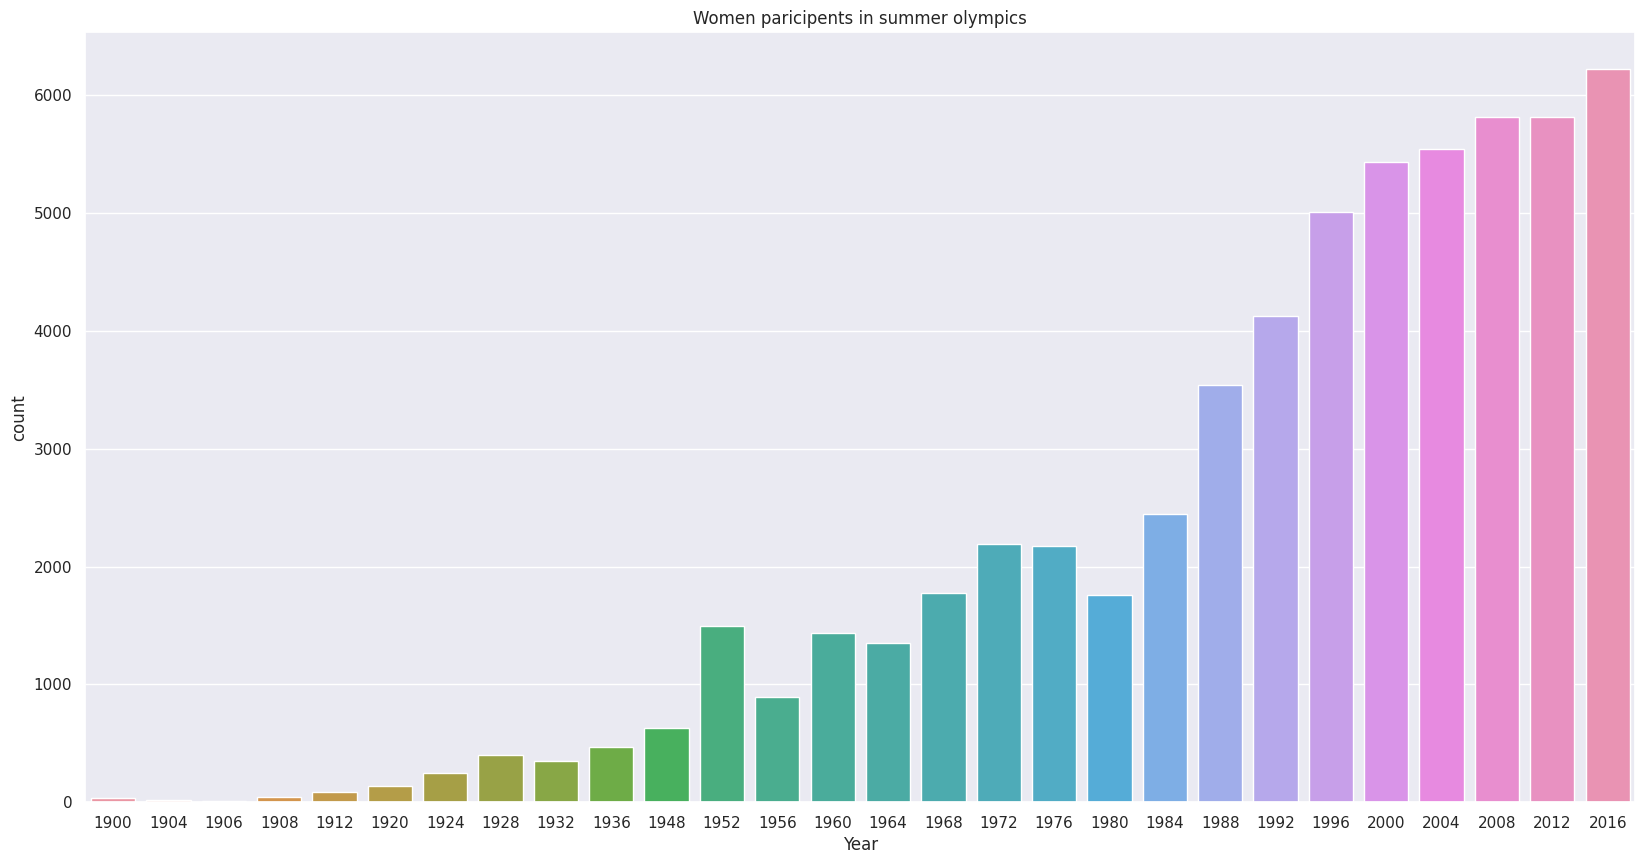

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=Female_athlete_summer)
plt.title("Women paricipents in summer olympics")
plt.show()

In [24]:
# Gold medalists

Gold_medal= athlete_df[(athlete_df.Medal=='Gold')]
Gold_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [25]:
Gold_medal=Gold_medal[np.isfinite(Gold_medal['Age'])]

In [26]:
#above 60 age gold medalist
medalist=Gold_medal[Gold_medal['Age']>60]
medalist[['Name','Age','Year','Sport']].reset_index()

,index,Name,Age,Year,Sport
0,104003,Isaac Lazarus Israls,63.0,1928,Art Competitions
1,105199,Charles Jacobus,64.0,1904,Roque
2,190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,1904,Archery
3,226374,"Galen Carter ""G. C."" Spencer",63.0,1904,Archery
4,233390,Oscar Gomer Swahn,64.0,1912,Shooting
5,261102,"Robert W. Williams, Jr.",63.0,1904,Archery


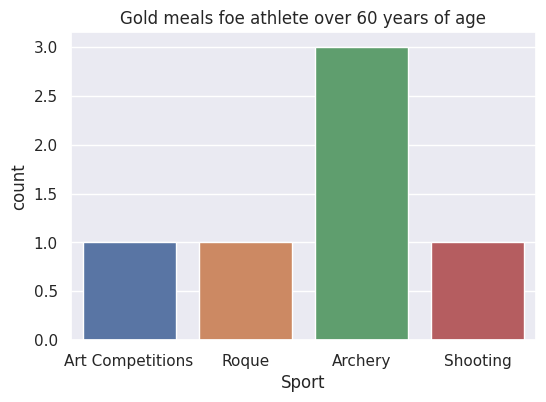

In [27]:
plt.figure(figsize=(6,4))
plt.title('Gold meals foe athlete over 60 years of age')
sns.countplot(x='Sport',data=medalist)
plt.show()

In [32]:
#Gold medals from each countries
gold=Gold_medal.Region.value_counts().reset_index().head(5)



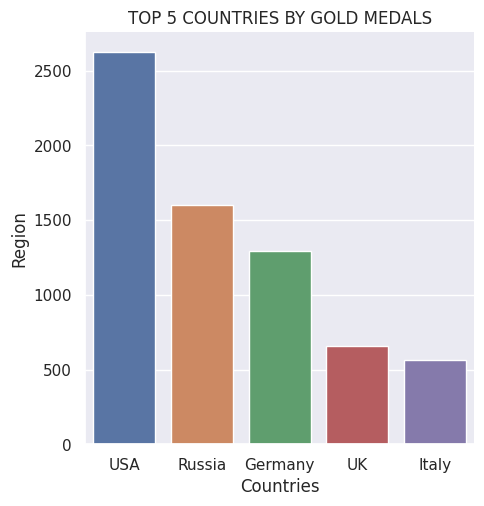

In [36]:
sns.catplot(data=gold,kind='bar',x='index',y='Region')
plt.title("TOP 5 COUNTRIES BY GOLD MEDALS")
plt.xlabel("Countries")
plt.show()

In [37]:
# Rio olympic country wise gold medals

max_year=athlete_df.Year.max()
max_year

2016

In [55]:
team_names= athlete_df[(athlete_df.Year==max_year) & (athlete_df.Medal=='Gold')].Team
team_names.value_counts().head(10)


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

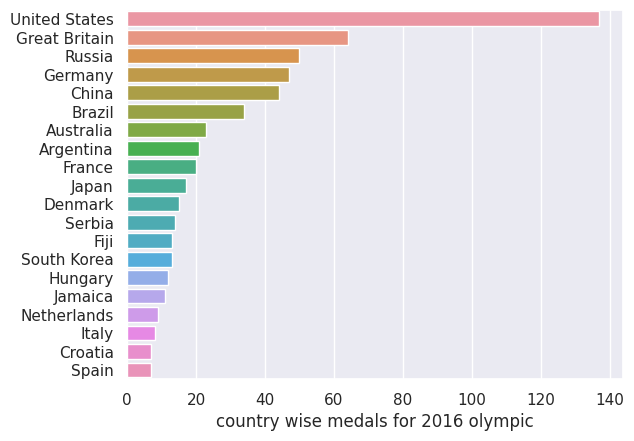

In [59]:

sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)
plt.xlabel("country wise medals for 2016 olympic")
plt.show()

In [60]:
not_null_medals=athlete_df[(athlete_df['Height'].notnull()) & (athlete_df['Weight'].notnull())]

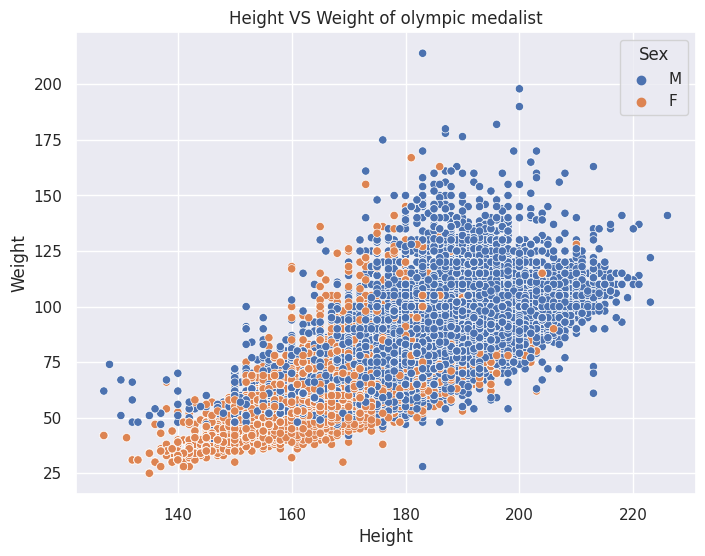

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Height',y='Weight',data=not_null_medals,hue='Sex')
plt.title('Height VS Weight of olympic medalist')
plt.show()